In [1]:
#mount google drive when on google colaboratory

from google.colab import drive
drive.mount('/content/drive')

#set repo path and check repo status
repo_path = '/content/drive/MyDrive/geomsha/'
%cd /content/drive/MyDrive/geomsha/
!git status


Mounted at /content/drive
/content/drive/MyDrive/geomsha
On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


In [9]:
#initialize environment, load modules/libraries

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import ensemble

In [2]:
loaded  = np.load('data/shapes.npz')
images = loaded['images']
labels = loaded['labels'][:,0].astype(int)

In [3]:
training = 0.8
training = int(training*len(images))

train_images = images[:training]
train_labels = labels[:training]
test_images = images[training:]
test_labels = labels[training:]

In [4]:
n_train = len(train_labels)
x_train = train_images.reshape((n_train, -1))
y_train = train_labels

n_test = len(test_labels)
x_test = test_images.reshape((n_test, -1))
y_test = test_labels

In [5]:
rfc = ensemble.RandomForestClassifier(max_depth=22, n_estimators=70,min_samples_leaf=2)
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=22, min_samples_leaf=2, n_estimators=70)

In [6]:
print("training accuracy : %.3f" % (rfc.score(x_train, y_train)))
print("test accuracy : %.3f" % (rfc.score(x_test, y_test)))

training accuracy : 0.999
test accuracy : 0.973


In [7]:
def gen_grid_image(images, grid):
    img_size = len(images[0])
    num_grid = grid[0]*grid[1]

    grid_img = np.zeros((1+(img_size+1)*grid[0],1+(img_size+1)*grid[1]))
    grid_pos = []
    for i, img in enumerate(images[:num_grid]):
        x = i//grid[1]
        y = i%grid[1]
        grid_pos.append((x,y))
        grid_img[1+(img_size+1)*x:1+(img_size+1)*x+img_size,1+(img_size+1)*y:1+(img_size+1)*y+img_size] = img
    return (grid_img, grid_pos)


position : target -> fail  (4=square, 3=triangle, 2=circle)
(0, 0) : 4 -> 3
(0, 1) : 4 -> 3
(0, 2) : 2 -> 4
(0, 3) : 4 -> 3
(0, 4) : 4 -> 2
(1, 0) : 2 -> 4
(1, 1) : 4 -> 3
(1, 2) : 4 -> 2
(1, 3) : 4 -> 3
(1, 4) : 2 -> 4
(2, 0) : 4 -> 3
(2, 1) : 2 -> 4
(2, 2) : 4 -> 3
(2, 3) : 3 -> 4
(2, 4) : 2 -> 4
(3, 0) : 4 -> 3
(3, 1) : 4 -> 3
(3, 2) : 2 -> 3
(3, 3) : 2 -> 4
(3, 4) : 2 -> 4


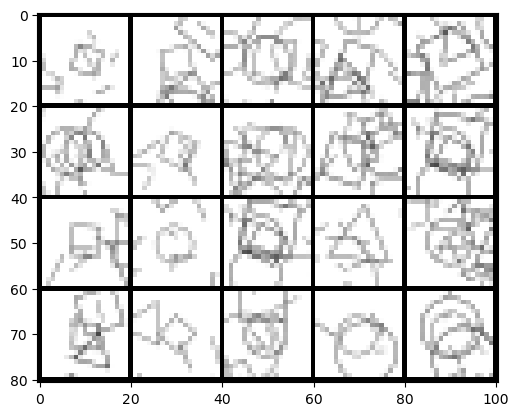

In [12]:
pred_labels = rfc.predict(x_test)

fail = np.not_equal(pred_labels,y_test)
fail_images = test_images[fail]
target_labels = y_test[fail]
fail_labels = pred_labels[fail]

grid = (4,5)
grid_image, grid_pos = gen_grid_image(fail_images, grid)

fig = plt.figure(figsize=(grid_image.shape[1],grid_image.shape[0]),dpi=1)
fig.figimage(grid_image, cmap='gray')
fig.savefig('data/tmp_fails.png')
plt.close()

print("\nposition : target -> fail  (4=square, 3=triangle, 2=circle)")

for i in range(grid[1]*grid[0]):
    print(f"{grid_pos[i]} : {target_labels[i]} -> {fail_labels[i]}")

plt.imshow(mpimg.imread('data/tmp_fails.png'))